In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
Wine1 = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 8 - PCA/wine.csv")
Wine1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
Wine = Wine1.drop(['Type'],axis=1)

In [4]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
Wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
Wine.shape

(178, 13)

In [7]:
# Performing PCA

In [8]:
# Converting into numpy array
wine = Wine.values
wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
# Normalizing the numerical data 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
wine_norm = norm_func(wine)
wine_norm

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [11]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_norm)
pca_values 

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03, ...,
         5.28219472e-05, -2.29467534e-05,  4.77801459e-05],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03, ...,
         2.36793241e-05, -3.40452399e-05,  8.09154665e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04, ...,
         1.41540730e-04, -2.90486020e-05, -2.10779181e-05],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03, ...,
        -1.32777740e-04,  5.71761518e-05,  2.15343422e-05],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03, ...,
        -1.81013009e-05, -3.10079415e-05,  7.90293761e-05],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03, ...,
         9.56770872e-05,  1.90015753e-05,  1.60351688e-05]])

In [12]:
#loadings or weights
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

In [13]:
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [14]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

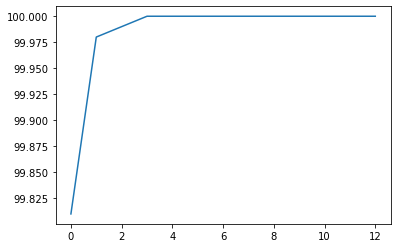

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1)

In [16]:
finalwine = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), Wine1[['Type']]], axis = 1)
finalwine

,pc1,pc2,pc3,Type
0,0.189635,0.012794,0.001864,1
1,0.180429,-0.003194,0.004062,1
2,0.260771,-0.003892,-0.000663,1
3,0.436486,0.000115,-0.000546,1
4,-0.006888,0.011007,-0.000330,1
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,3
174,0.001864,0.001390,-0.002566,3
175,0.052658,0.011177,-0.001332,3
176,0.055633,0.011114,-0.001065,3


# Performing H clustering

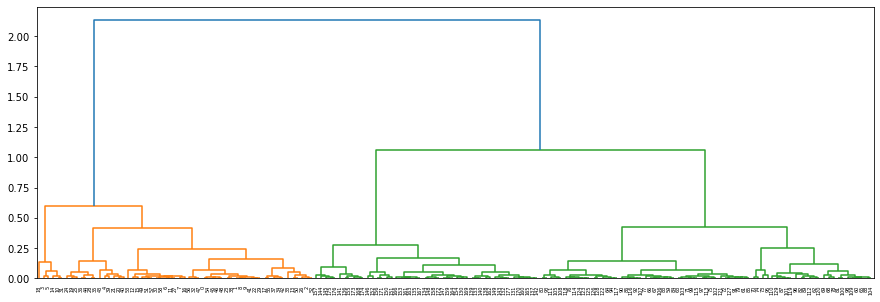

In [17]:
# creating dendrogram

plt.figure(figsize=(15, 5))  
dendrogram = sch.dendrogram(sch.linkage(finalwine, method='complete'))

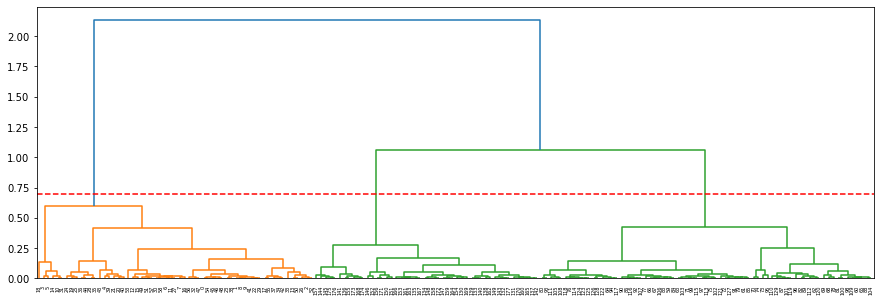

In [18]:
plt.figure(figsize=(15, 5))  
dendrogram = sch.dendrogram(sch.linkage(finalwine, method='complete'))
plt.axhline(y=0.7, color='r', linestyle='--')
plt.show()

In [19]:
# it is evident from the above dendrogram 3 is optimal number of clusters on wine PCA dataset

In [20]:
# lets create a dendrogram for original wine data without PCA

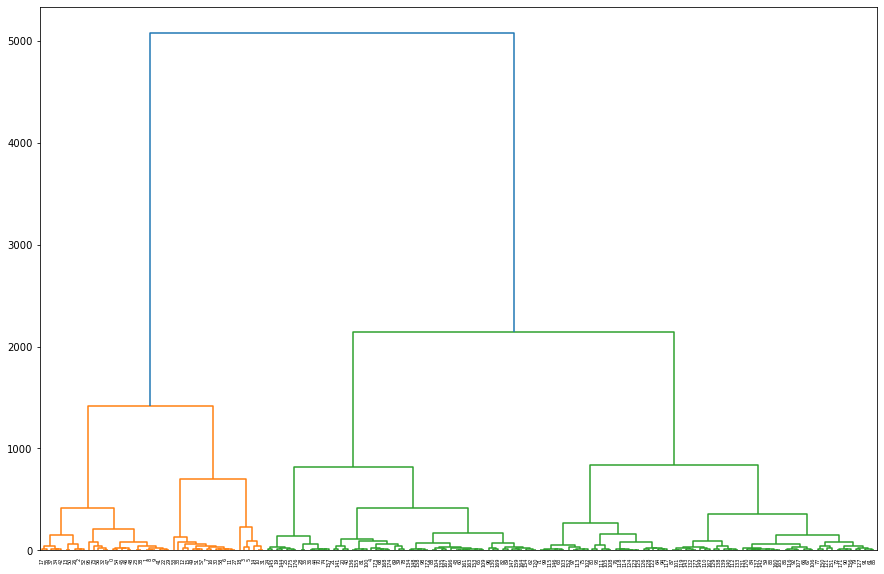

In [21]:
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(wine, method='ward'))

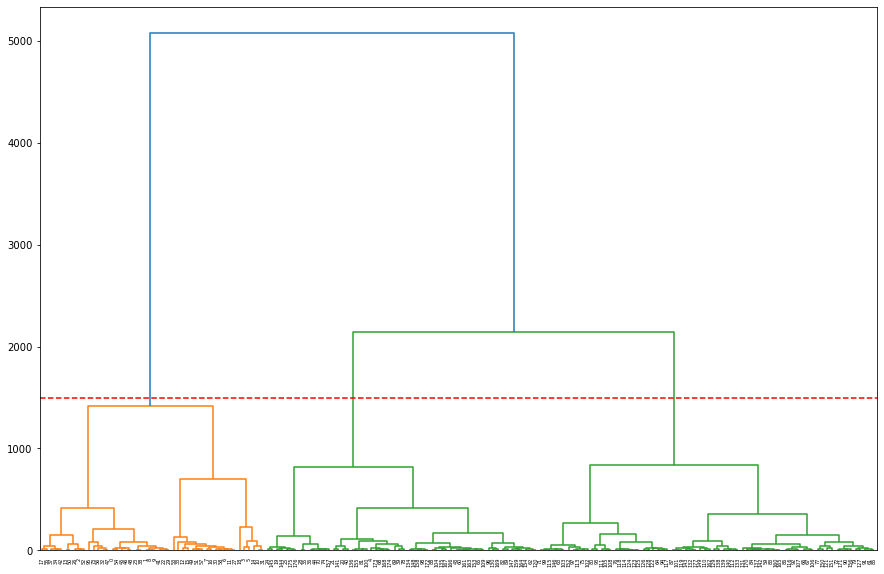

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(wine, method='ward'))
plt.axhline(y=1500, color='r', linestyle='--')
plt.show()

In [23]:
# we get same number of clusters = 3 with PCA data and original data

# Performing Kmeans Clustering 

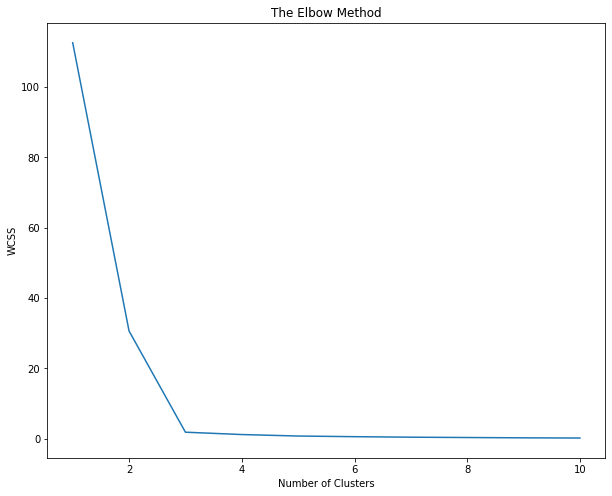

In [24]:
# Elbow method to find the optimum no of clusters
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(finalwine)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [25]:
# Silhouette score method to confirm # of clusters
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(finalwine).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(finalwine,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.8906887433929627
Silhouette score for k(clusters) = 4 is 0.7934893991312635
Silhouette score for k(clusters) = 5 is 0.682206303519393
Silhouette score for k(clusters) = 6 is 0.6914427573862966
Silhouette score for k(clusters) = 7 is 0.5852242596504926
Silhouette score for k(clusters) = 8 is 0.5991039010559501
Silhouette score for k(clusters) = 9 is 0.600289953594697
Silhouette score for k(clusters) = 10 is 0.58086854301018
Silhouette score for k(clusters) = 11 is 0.5854630977632328
Silhouette score for k(clusters) = 12 is 0.5670398967066603


In [26]:
# optimal number of Kmean clusters for PCA wine data is 3.

In [27]:
# lets create a elbow curve for original data without PCA 

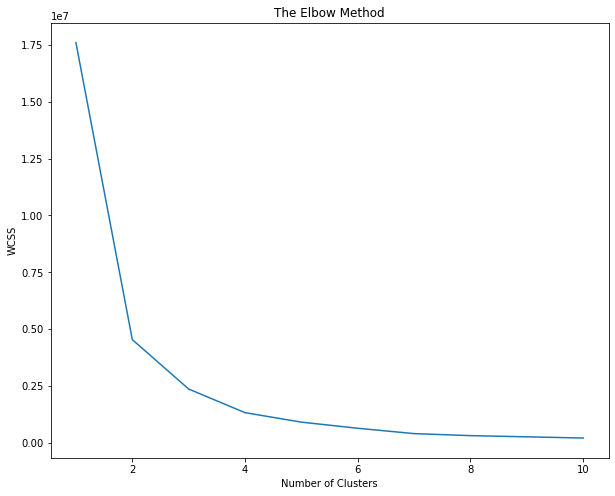

In [28]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(wine)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [29]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(wine).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(wine,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5711381937868844
Silhouette score for k(clusters) = 4 is 0.5620323449580353
Silhouette score for k(clusters) = 5 is 0.548999323979569
Silhouette score for k(clusters) = 6 is 0.5656413100386389
Silhouette score for k(clusters) = 7 is 0.5621677013863717
Silhouette score for k(clusters) = 8 is 0.5363482509606237
Silhouette score for k(clusters) = 9 is 0.5279415465513754
Silhouette score for k(clusters) = 10 is 0.5211265497597605
Silhouette score for k(clusters) = 11 is 0.5160234147250763
Silhouette score for k(clusters) = 12 is 0.5162767171782998


In [30]:
# its evident from elbow curve and Silhouette score optimal number of clusters = 3